**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib

**DATA PREPARATION**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1B3IdBV4UuoN_UiP0vVkz1-BlF7njzMV3/view'

In [ ]:
id = link.split('/')[-2]
drive = 'https://drive.google.com/uc?id=' + id

In [ ]:
data = pd.read_csv(drive)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#**DATA PRE-PROCESSING**#

TAKING CARE OF MISSING DATA

In [ ]:
# Checking for null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

CONVERT STRING VALUES TO FLOAT

In [ ]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['smoking_history'] = data['smoking_history'].map({'never':0, 'former':1, 'current':2, 'No Info':3})


HEATMAP:
**Plotting the Heatmap to see the correlations between features.**

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

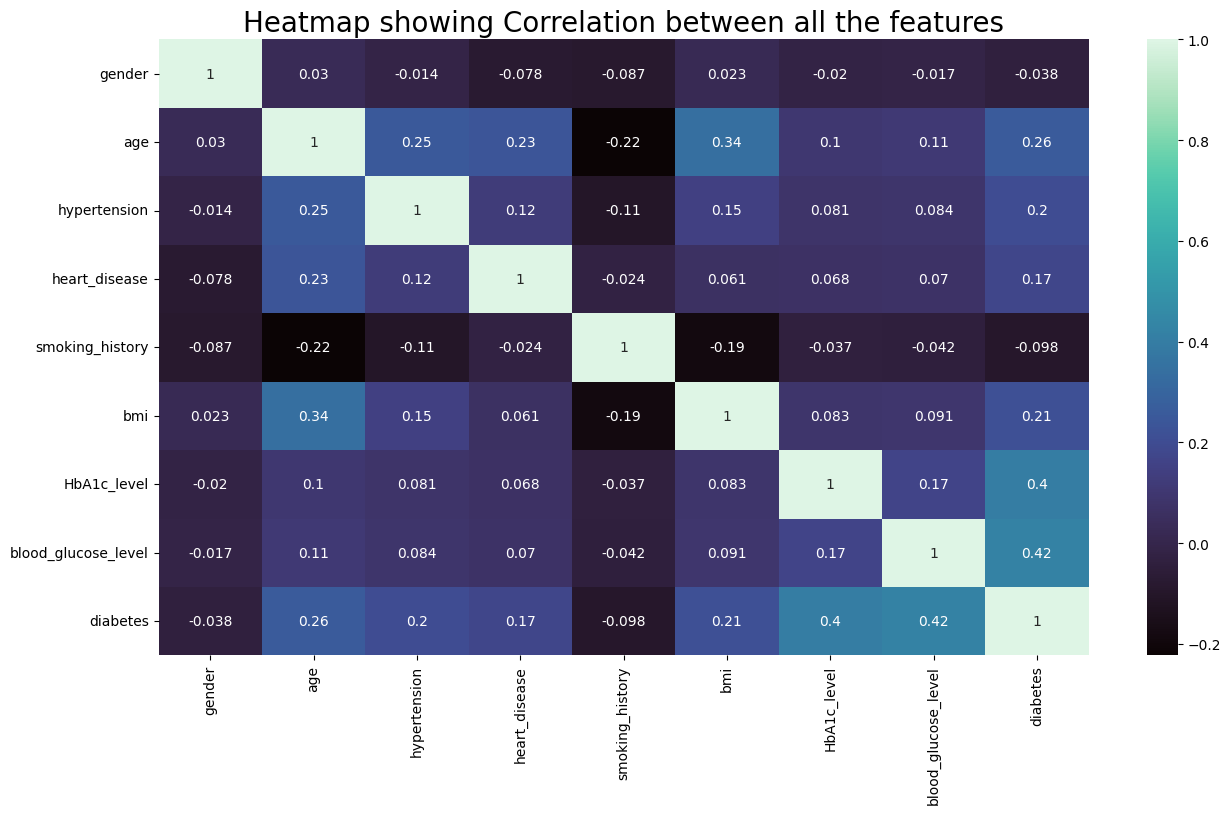

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='mako')

DROPPING WEAKER CORRELATIONS FROM THE DATASET

In [ ]:
df = data.drop(["gender", "smoking_history"], axis = 1)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


FEATURE SCALING

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit(df.drop('diabetes',axis=1)).transform(df.drop('diabetes',axis=1))
data_scaled = pd.DataFrame(scaled, columns=df.columns[:-1])
data_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183


ENCODING CATEGORICAL DATA

In [ ]:
#Splitting the columns in to dependent variable (x) and independent variable (y).
X = data_scaled
y = df['diabetes']

In [ ]:
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

#**IMPLEMENTATION OF SVM - SUPPORT VECTOR MACHINE AS MODEL ARCHITECTURE**#

SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

APPLY SVM MODEL USING GAUSSIAN RBF KERNEL FUNCTION

In [ ]:
rbf_svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)

ACCURARY

In [ ]:
model_accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {model_accuracy * 100:.2f}%')

Model Accuracy: 96.59%


CONFUSION MATRIX

<Axes: >

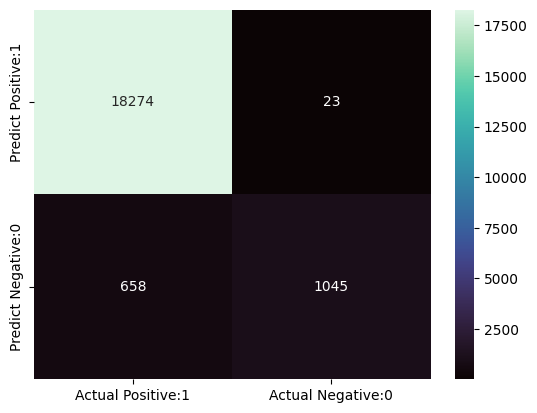

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.98      0.61      0.75      1703

    accuracy                           0.97     20000
   macro avg       0.97      0.81      0.87     20000
weighted avg       0.97      0.97      0.96     20000



PREDICTION

In [ ]:
import numpy as np

# Collect user input for the  features
age = float(input("Enter Age: "))
hypertension = float(input("Hypertension (0 for No, 1 for Yes): "))
heart_disease = float(input("Heart Disease (0 for No, 1 for Yes): "))
bmi = float(input("Enter BMI: "))
hba1c_level = float(input("Enter HbA1c Level: "))
blood_glucose_level = float(input("Enter Blood Glucose Level: "))


# Organize user input into a numpy array
user_input = np.array([age, hypertension, heart_disease, bmi, hba1c_level, blood_glucose_level]).reshape(1, -1)

# Scale the user input using the same StandardScaler used for the training data
user_input_scaled = scaler.transform(user_input)

# Make a prediction using the trained SVM model
prediction = rbf_svc.predict(user_input_scaled)

# Print the prediction
if prediction == 1:
    print("The user has Diabetes.")
else:
    print("The user is doesn't have Diabetes.")

Enter Age: 47
Hypertension (0 for No, 1 for Yes): 1
Heart Disease (0 for No, 1 for Yes): 1
Enter BMI: 23.8
Enter HbA1c Level: 6.5
Enter Blood Glucose Level: 200
The user has Diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SAVING MODEL

In [ ]:
import joblib

# Save the trained SVM model
svm_model_filename = 'svm_model.pkl'
joblib.dump(rbf_svc, svm_model_filename)

# Save the StandardScaler object
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)


['scaler.pkl']